In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.animation as animation

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [2]:
#Read in CSV File Dataset 
All_DataScience_Salaries_df = pd.read_csv('Resources/Data Science Salary Dataset.csv')

All_DataScience_Salaries_df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
#Total Columns and number of entries 
All_DataScience_Salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
#Finding Values 
All_DataScience_Salaries_df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [5]:
#Finding values with objects 
All_DataScience_Salaries_df.describe(include='object')

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [6]:
#Find missing values 
All_DataScience_Salaries_df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

No mimssing vlaues i this dataset.


In [7]:
#Checking for duplicate values  
All_DataScience_Salaries_df.duplicated().sum()

0

No duplicates in this dataset.

In [8]:
All_DataScience_Salaries_df['experience_level'] = All_DataScience_Salaries_df['experience_level'].replace('EN','Junior')
All_DataScience_Salaries_df['experience_level'] = All_DataScience_Salaries_df['experience_level'].replace('MI','Middle')
All_DataScience_Salaries_df['experience_level'] = All_DataScience_Salaries_df['experience_level'].replace('SE','Senior')
All_DataScience_Salaries_df['experience_level'] = All_DataScience_Salaries_df['experience_level'].replace('EX','Executive')

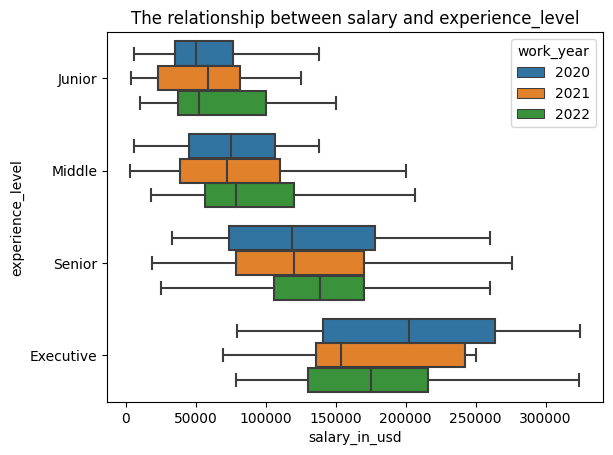

In [9]:
#Showing a visual of all careers, years and there U.S. Salary 
order = ['Junior', 'Middle', 'Senior','Executive']
sns.boxplot(x=All_DataScience_Salaries_df['salary_in_usd'],
             y=All_DataScience_Salaries_df['experience_level'], 
             order=order,
             hue=All_DataScience_Salaries_df['work_year'],
             showfliers = False)   
plt.title('The relationship between salary and experience_level');

Overview of all experience levels with salary in the U.S. in 2020,2021,2022

Filtering to find Data Analyst, Business Analyst, Bi Analyst Title. 

In [10]:
job_counts=All_DataScience_Salaries_df['job_title'].value_counts()

job_counts

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

Filter to Data Analyst, Marketing Data Analyst, Data Analytics Lead, Business Data Analyst, BI Data Analyst, Data Analytics Manager, Data Analytics Lead, Head of Data.

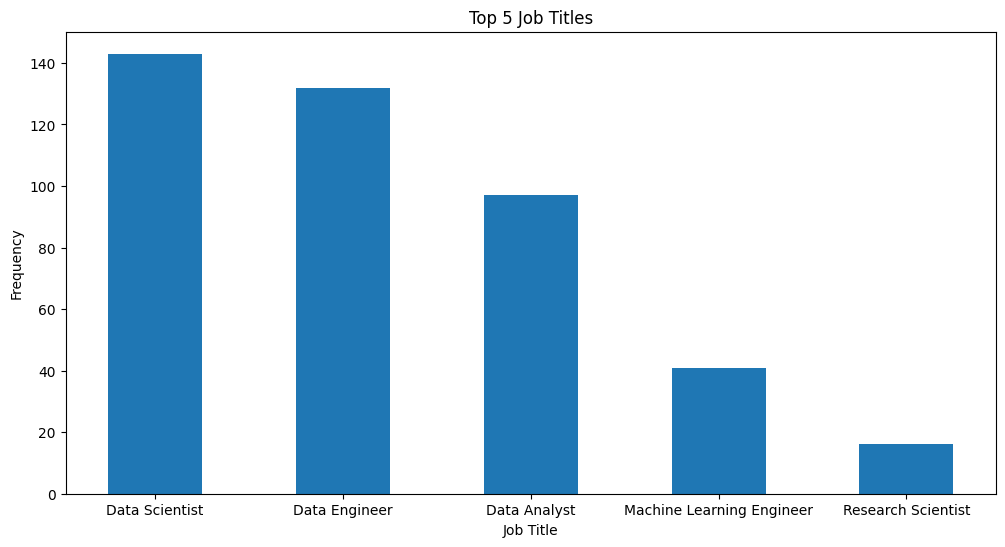

In [11]:
top5_job_title = All_DataScience_Salaries_df.job_title.value_counts()[:5]
plt.figure(figsize = (12,6))
plt.title('Top 5 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.bar(x = top5_job_title.index ,height = top5_job_title.values , width = 0.5);
plt.show()


In [12]:
DataScience_New_DF= All_DataScience_Salaries_df.drop("employee_residence", axis='columns')

DataScience_New_DF

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,0,2020,Middle,FT,Data Scientist,70000,EUR,79833,0,DE,L
1,1,2020,Senior,FT,Machine Learning Scientist,260000,USD,260000,0,JP,S
2,2,2020,Senior,FT,Big Data Engineer,85000,GBP,109024,50,GB,M
3,3,2020,Middle,FT,Product Data Analyst,20000,USD,20000,0,HN,S
4,4,2020,Senior,FT,Machine Learning Engineer,150000,USD,150000,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,Senior,FT,Data Engineer,154000,USD,154000,100,US,M
603,603,2022,Senior,FT,Data Engineer,126000,USD,126000,100,US,M
604,604,2022,Senior,FT,Data Analyst,129000,USD,129000,0,US,M
605,605,2022,Senior,FT,Data Analyst,150000,USD,150000,100,US,M


In [13]:

DataScience_clean_DF= DataScience_New_DF.drop("salary_currency", axis='columns')

DataScience_clean_DF




,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,remote_ratio,company_location,company_size
0,0,2020,Middle,FT,Data Scientist,70000,79833,0,DE,L
1,1,2020,Senior,FT,Machine Learning Scientist,260000,260000,0,JP,S
2,2,2020,Senior,FT,Big Data Engineer,85000,109024,50,GB,M
3,3,2020,Middle,FT,Product Data Analyst,20000,20000,0,HN,S
4,4,2020,Senior,FT,Machine Learning Engineer,150000,150000,50,US,L
...,...,...,...,...,...,...,...,...,...,...
602,602,2022,Senior,FT,Data Engineer,154000,154000,100,US,M
603,603,2022,Senior,FT,Data Engineer,126000,126000,100,US,M
604,604,2022,Senior,FT,Data Analyst,129000,129000,0,US,M
605,605,2022,Senior,FT,Data Analyst,150000,150000,100,US,M


In [14]:
DataScience_clean_DF2=DataScience_clean_DF.drop("salary", axis='columns')
DataScience_clean_DF2

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,0,2020,Middle,FT,Data Scientist,79833,0,DE,L
1,1,2020,Senior,FT,Machine Learning Scientist,260000,0,JP,S
2,2,2020,Senior,FT,Big Data Engineer,109024,50,GB,M
3,3,2020,Middle,FT,Product Data Analyst,20000,0,HN,S
4,4,2020,Senior,FT,Machine Learning Engineer,150000,50,US,L
...,...,...,...,...,...,...,...,...,...
602,602,2022,Senior,FT,Data Engineer,154000,100,US,M
603,603,2022,Senior,FT,Data Engineer,126000,100,US,M
604,604,2022,Senior,FT,Data Analyst,129000,0,US,M
605,605,2022,Senior,FT,Data Analyst,150000,100,US,M


In [15]:
filter_list = ['Data Analyst', 'Data Analytics Manager','BI Data Analyst ','Business Data Analyst ', 'Head of Data ', 'Marketing Data Analyst ','Data Analytics Lead ']
Filter_jobTitle=DataScience_clean_DF2[DataScience_clean_DF2.job_title.isin(filter_list)]

Filter_jobTitle

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
5,5,2020,Junior,FT,Data Analyst,72000,100,US,L
14,14,2020,Middle,FT,Data Analyst,85000,100,US,L
15,15,2020,Middle,FT,Data Analyst,8000,50,PK,L
34,34,2020,Middle,FT,Data Analyst,46759,50,FR,L
38,38,2020,Junior,FT,Data Analyst,10000,100,NG,S
...,...,...,...,...,...,...,...,...,...
597,597,2022,Senior,FT,Data Analyst,170000,100,US,M
600,600,2022,Junior,FT,Data Analyst,67000,0,CA,M
601,601,2022,Junior,FT,Data Analyst,52000,0,CA,M
604,604,2022,Senior,FT,Data Analyst,129000,0,US,M


In [16]:
filter_list = ['Junior', "Middle"]
Filter_Experience=Filter_jobTitle[Filter_jobTitle.experience_level.isin(filter_list)]

Filter_Experience

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
5,5,2020,Junior,FT,Data Analyst,72000,100,US,L
14,14,2020,Middle,FT,Data Analyst,85000,100,US,L
15,15,2020,Middle,FT,Data Analyst,8000,50,PK,L
34,34,2020,Middle,FT,Data Analyst,46759,50,FR,L
38,38,2020,Junior,FT,Data Analyst,10000,100,NG,S
50,50,2020,Junior,FT,Data Analyst,6072,0,IN,S
51,51,2020,Junior,FT,Data Analyst,91000,100,US,L
79,79,2021,Junior,FT,Data Analyst,80000,100,US,M
86,86,2021,Junior,FT,Data Analyst,59102,50,FR,M
100,100,2021,Middle,FT,Data Analyst,75000,0,US,L


In [17]:
filter_list = ['S', 'M']
Filter_CompanySize=Filter_Experience[Filter_Experience.company_size.isin(filter_list)]

Filter_CompanySize.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
38,38,2020,Junior,FT,Data Analyst,10000,100,NG,S
50,50,2020,Junior,FT,Data Analyst,6072,0,IN,S
79,79,2021,Junior,FT,Data Analyst,80000,100,US,M
86,86,2021,Junior,FT,Data Analyst,59102,50,FR,M
118,118,2021,Junior,FT,Data Analyst,90000,100,US,S


In [18]:
filter_list = ['US']
Filter_CompanyLocation=Filter_CompanySize[Filter_CompanySize.company_location.isin(filter_list)]

Filter_CompanyLocation



,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
79,79,2021,Junior,FT,Data Analyst,80000,100,US,M
118,118,2021,Junior,FT,Data Analyst,90000,100,US,S
122,122,2021,Junior,FT,Data Analyst,50000,100,US,M
135,135,2021,Middle,FT,Data Analyst,90000,100,US,M
172,172,2021,Junior,FT,Data Analyst,60000,100,US,S
307,307,2022,Middle,FT,Data Analyst,106260,0,US,M
308,308,2022,Middle,FT,Data Analyst,126500,0,US,M
329,329,2022,Middle,FT,Data Analyst,115500,100,US,M
336,336,2022,Middle,FT,Data Analyst,167000,100,US,M
367,367,2022,Middle,FT,Data Analyst,58000,0,US,S


In [19]:
len(Filter_CompanyLocation)

13

In [22]:
average_salary=Filter_CompanyLocation["salary_in_usd"].mean()

average_salary

91250.76923076923

In [39]:
filtered_df = DataScience_clean_DF2.loc[DataScience_clean_DF2['job_title'] == 'Data Analyst'] 
                                                    

filtered_df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
5,5,2020,Junior,FT,Data Analyst,72000,100,US,L
14,14,2020,Middle,FT,Data Analyst,85000,100,US,L
15,15,2020,Middle,FT,Data Analyst,8000,50,PK,L
34,34,2020,Middle,FT,Data Analyst,46759,50,FR,L
38,38,2020,Junior,FT,Data Analyst,10000,100,NG,S
...,...,...,...,...,...,...,...,...,...
597,597,2022,Senior,FT,Data Analyst,170000,100,US,M
600,600,2022,Junior,FT,Data Analyst,67000,0,CA,M
601,601,2022,Junior,FT,Data Analyst,52000,0,CA,M
604,604,2022,Senior,FT,Data Analyst,129000,0,US,M


In [41]:


filteredExperience_df = filtered_df.loc[filtered_df['experience_level'] == 'Junior'] 
                                                    

filteredExperience_df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
5,5,2020,Junior,FT,Data Analyst,72000,100,US,L
38,38,2020,Junior,FT,Data Analyst,10000,100,NG,S
50,50,2020,Junior,FT,Data Analyst,6072,0,IN,S
51,51,2020,Junior,FT,Data Analyst,91000,100,US,L
79,79,2021,Junior,FT,Data Analyst,80000,100,US,M
86,86,2021,Junior,FT,Data Analyst,59102,50,FR,M
118,118,2021,Junior,FT,Data Analyst,90000,100,US,S
122,122,2021,Junior,FT,Data Analyst,50000,100,US,M
124,124,2021,Junior,PT,Data Analyst,10354,50,ES,M
172,172,2021,Junior,FT,Data Analyst,60000,100,US,S


In [45]:
experience_level= (DataScience_clean_DF2.job_title =="Junior")

experience_level

0      False
1      False
2      False
3      False
4      False
       ...  
602    False
603    False
604    False
605    False
606    False
Name: job_title, Length: 607, dtype: bool

In [48]:
filter_list = ['Junior', 'Middle']
Filter_Experience=DataScience_clean_DF2[DataScience_clean_DF2.job_title.isin(filter_list)]

Filter_Experience

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
